<a href="https://colab.research.google.com/github/ashiqur9/Facial_Recognition_Using_Keras/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 
#Imoort Necessary Package  
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd

In [0]:
 
#Read Face Dataset
data=pd.read_pickle('/content/drive/My Drive/Dataset/Avengers.pkl')

In [3]:
data['target']

['robert_downey_jr',
 'Chris_Hemsworth',
 'Chris_Evans',
 'Mark_Ruffalo',
 'Scarlett_Johansson',
 'Cobie_Smulders',
 'Tom_Holland',
 'Paul_Rudd']

In [0]:
 
#Load Face Case classifier 
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Dataset/haarcascade_frontalface_default.xml')

In [0]:
 
#Load Train Model
classifier =load_model('/content/drive/My Drive/Dataset/Avengers.h5')

In [6]:
 
#Model Summary 
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
activation_8 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 62, 62, 64)        8256      
_________________________________________________________________
batch_normalization_9 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 64)       

In [0]:
class_labels =data['target']

In [0]:
 
#Define Function to recognize face  
def face_detector(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_copy = np.copy(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, 2.0, 6)
    print('Number of faces detected:', len(faces))
    if len(faces)==0:
        faces = face_cascade.detectMultiScale(gray_image, 1.5, 6)
        print('Number of faces detected:', len(faces))
        
    for f in faces:
        x, y, w, h = [ v for v in f ]
        print(y,y+h,x,x+w)
        #cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255,0,0), 3)
        # Define the region of interest in the image  
        face_crop = image_copy[y:y+h, x:x+w]
        cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255,0,0), 3)
 
    if len(faces)==1:
      image=face_crop
      r = 128.0 / image.shape[1]
      dim = (128, int(image.shape[0] * r))
      # perform the actual resizing of the image and show it
      resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
 
      roi = img_to_array(resized)
      roi = np.expand_dims(roi,axis=0)
      preds = classifier.predict(roi)[0]
      #print(preds)
      label=class_labels[preds.argmax()]
      label_position = (x,y)
      #print(preds)
      plt.imshow(image_copy)
      plt.xlabel(label)

Number of faces detected: 1
140 524 434 818


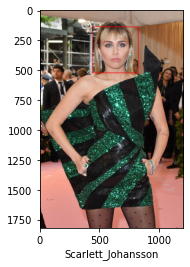

In [12]:
 
#Calling Function 
face_detector('/content/drive/My Drive/face/Miley_Cyrus/00000056.jpg')

In [0]:
import os

In [0]:
 
#Path to multiple faces 
path = '/content/drive/My Drive/test/'

Number of faces detected: 0
Number of faces detected: 1
72 687 33 648


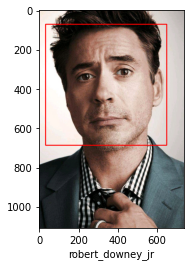

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
152 344 423 615


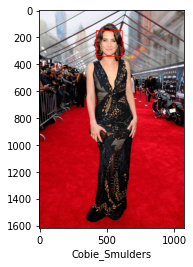

Number of faces detected: 1
108 300 716 908


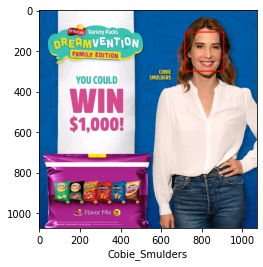

Number of faces detected: 1
211 403 502 694


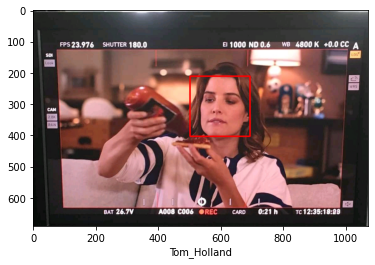

Number of faces detected: 0
Number of faces detected: 2
44 226 270 452
69 191 302 424
Number of faces detected: 1
112 304 228 420


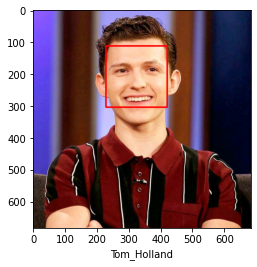

Number of faces detected: 1
162 354 141 333


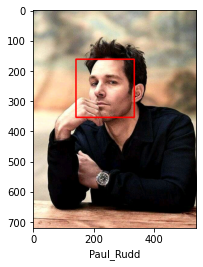

Number of faces detected: 1
212 596 354 738


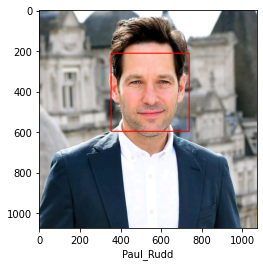

Number of faces detected: 1
219 987 128 896


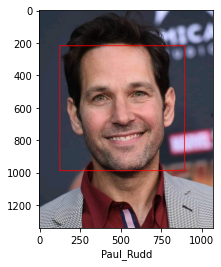

Number of faces detected: 1
232 616 270 654


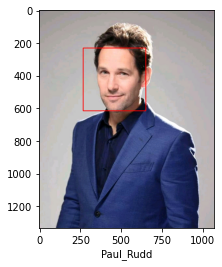

Number of faces detected: 1
49 241 153 345


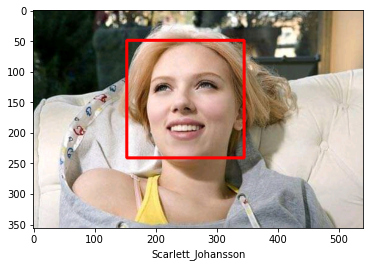

Number of faces detected: 0
Number of faces detected: 1
32 305 90 363


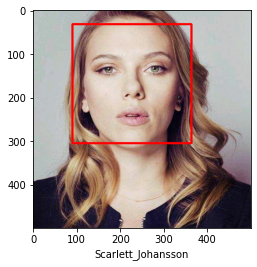

Number of faces detected: 0
Number of faces detected: 0
Number of faces detected: 1
221 413 306 498


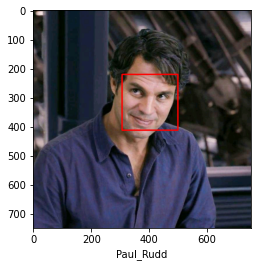

Number of faces detected: 1
33 417 219 603


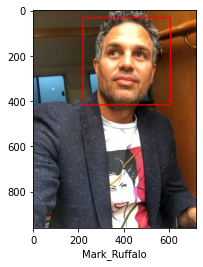

Number of faces detected: 0
Number of faces detected: 0


In [19]:
 
#Detect Faces in a folder
for dir in os.listdir(path):
  i1, i2 = 8, randint(0, 7)
  for idx, img in enumerate(sorted(os.listdir(path + dir))):
    image = cv2.imread(path + dir + '/' + img)
    #image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_copy = np.copy(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, 2.0, 6)
    print('Number of faces detected:', len(faces))
    if len(faces)==0:
        faces = face_cascade.detectMultiScale(gray_image, 1.5, 6)
        print('Number of faces detected:', len(faces))
        
    for f in faces:
        x, y, w, h = [ v for v in f ]
        print(y,y+h,x,x+w)
        #cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255,0,0), 3)
        # Define the region of interest in the image  
        face_crop = image_copy[y:y+h, x:x+w]
        cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255,0,0), 3)
 
    if len(faces)==1:
      image=face_crop
      r = 128.0 / image.shape[1]
      dim = (128, int(image.shape[0] * r))
      # perform the actual resizing of the image and show it
      resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
 
      roi = img_to_array(resized)
      roi = np.expand_dims(roi,axis=0)
      preds = classifier.predict(roi)[0]
      label=class_labels[preds.argmax()]
      plt.imshow(image_copy)
      plt.xlabel(label)      
      plt.show()